In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
iris = load_iris()

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target


df['species'].map({0: 'setosa',1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


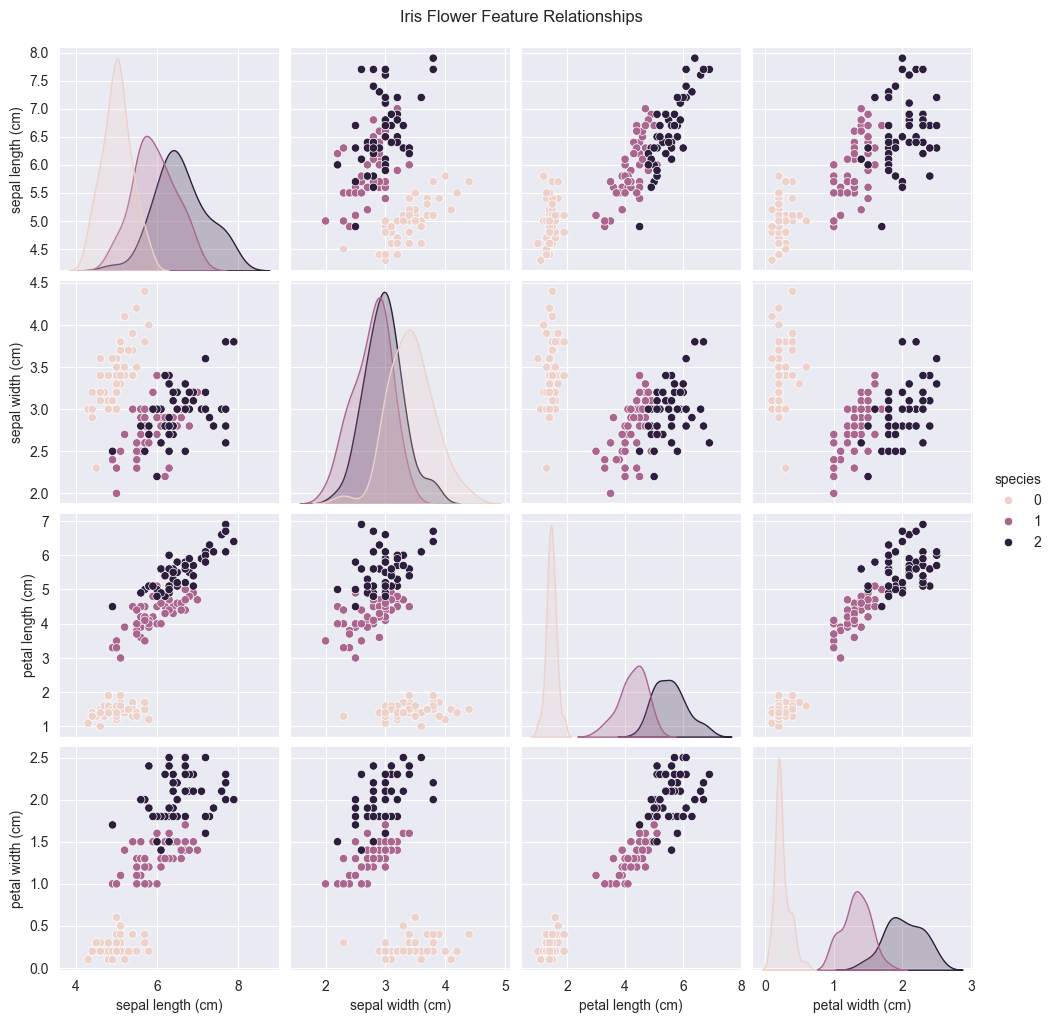

In [5]:
sns.pairplot(df, hue='species')
plt.suptitle("Iris Flower Feature Relationships", y=1.02)
plt.show()

In [6]:
x = df.drop('species', axis = 1)
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)


model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = model.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
classification_report(y_test,y_pred)

Accuracy: 0.9555555555555556


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        14\n           1       0.94      0.94      0.94        18\n           2       0.92      0.92      0.92        13\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'

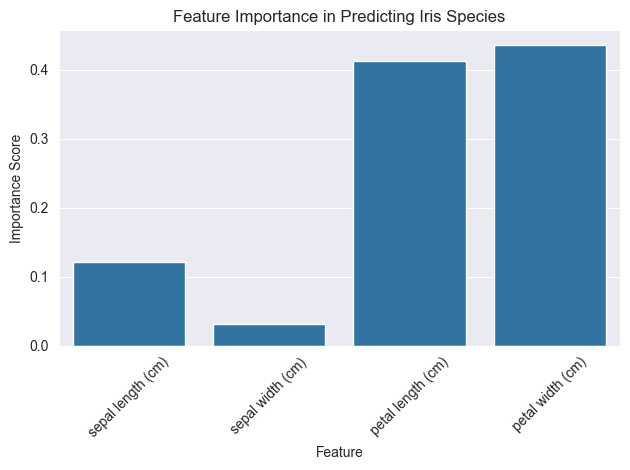

In [10]:
importances = model.feature_importances_
feature_names = iris.feature_names

sns.barplot(x=feature_names, y=importances)
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance in Predicting Iris Species")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()